# Práctica - Recuperación de Información Elasticsearch & Kibana & Python

Autores
    * Raúl Sánchez Martín
    * Ignacio Arias Barra

# Análisis

En el presente notebook se llevará a cabo la resolución utilizando Python, el cliente elasticsearch, pandas y matplotlib para la resolución de las diferentes consultas incluidas en la memoria.

In [1]:
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search
from datetime import datetime
import pandas as pd
import json
import seaborn
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt_py
%matplotlib inline

In [2]:
client = Elasticsearch(["http://127.0.0.1:9200"])

# INDEX = "testing"
INDEX = "opnfvindex"

### Ver índices que hay en kibana (en terminal, en la url del browser o en dev tools de kibana)
### curl localhost:9200/_cat/indices

La siguiente función exportará el resultado de una query a un json, para poder realizar la representación gráfica con python. Esta representación servirá para compararla con la realizada con Kibana.

In [3]:
def show_and_export_data(filename, searc_object, plot_path):
    result = s.execute()
    json_dicc = result.to_dict()["aggregations"]

    with open(plot_path + filename, 'w') as outfile:
        json.dump(json_dicc, outfile, indent= 1)
        
    return json_dicc



Las siguientes funciones convertirán el resultado de una query, en formato json, a un formato dataframe de la librería de pandas, la cuál permitirá la posterior visualización.

In [4]:
def get_df(dict_data, key1, key2, metric, key3 = "key", size = 10,
          transform = True):
    columns = [metric]
    data = {}
    data[metric] = []
    index = []
    extract_results = dict_data[key1][key2]
    for item in extract_results:
        index.append(item[key3])
        data[metric].append(item[metric]["value"])
        
    df_results = pd.DataFrame(data=data, index=index)
    
    if transform:
        df_results = df_results.sort_values(by = metric ,ascending=False)
        df_results[[metric]] = df_results[[metric]].astype(np.int64)

        df_results = df_results.head(size)
    
    return df_results



def get_df_composed(dict_data, bucket1, bucket2, key_buckets , metric, key3 = "key", size = 10,
          transform = True):
    columns = [metric]
    data = {}
    data[metric] = []
    index = []
    list_of_df_results = list()
    
    for company in dict_data[bucket1][key_buckets]:
        extract_results = company[bucket2][key_buckets]        
        for item in extract_results:
            index.append(item[key3])
            data[metric].append(item[metric]["value"])
            data[bucket1] = company[key3]

        df_results = pd.DataFrame(data=data, index=index)

        if transform:
            df_results[[metric]] = df_results[[metric]].astype(np.int64)
            df_results = df_results.sort_values(by = metric ,ascending=False)
            

            df_results = df_results.head(size)
            list_of_df_results.append(df_results)
    final_df = pd.concat(list_of_df_results)
    return final_df

## Queries

### 1. Organizaciones que participan

###### Visualización json Kibana query 1 (número de commits, archivo para importar)

```
[
  {
    "_id": "e8cbffa0-395b-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query1_BarPlot_NumeroCommits",
      "visState": "{\"title\":\"Query1_BarPlot_NumeroCommits\",\"type\":\"histogram\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"scale\":\"linear\",\"mode\":\"stacked\",\"times\":[],\"addTimeMarker\":false,\"defaultYExtents\":false,\"setYExtents\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"count\",\"schema\":\"metric\",\"params\":{\"customLabel\":\"Number of commits\"}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"Commit_org_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"1\",\"customLabel\":\"Organization\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 1, pie chart (número de commits, archivo para importar)

```
[
  {
    "_id": "c09f2880-395c-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query1_PieChart_NumeroCommits",
      "visState": "{\"title\":\"Query1_PieChart_NumeroCommits\",\"type\":\"pie\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"isDonut\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"count\",\"schema\":\"metric\",\"params\":{}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"Commit_org_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"1\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 1 (número de desarroladores, archivo para importar)

```
[
  {
    "_id": "30ce67d0-395b-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query1_BarPlot_NumeroDesarrolladores",
      "visState": "{\"title\":\"Query1_BarPlot_NumeroDesarrolladores\",\"type\":\"histogram\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"scale\":\"linear\",\"mode\":\"stacked\",\"times\":[],\"addTimeMarker\":false,\"defaultYExtents\":false,\"setYExtents\":false},\"aggs\":[{\"id\":\"2\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"Author\",\"customLabel\":\"Number of developers\"}},{\"id\":\"3\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"Commit_org_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"2\",\"customLabel\":\"Organization\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 1, pie chart (número de desarroladores, archivo para importar)

```
[
  {
    "_id": "92b92b40-395d-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query1_PieChart_NumeroDesarrolladores",
      "visState": "{\"title\":\"Query1_PieChart_NumeroDesarrolladores\",\"type\":\"pie\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"isDonut\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"Author\"}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"Commit_org_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"1\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```



##### Kibana query 1: Bar Plot (número de commits) #####

Query

```
GET opnfvindex/_search
{
    "size": 0,
    "query": {
        "match_all": {}
    }, "post_filter": {
      "range": {
        "author_date": {
          "gte": "2015-01-01T00:00:00",
          "lte": "2018-01-01T00:00:00"
        }
      }
    }, "aggs": {
      "by_company": {
        "terms": {
          "field": "Commit_org_name"
        }, "aggs": {
          "Commits": {
            "value_count": {
              "field": "Commit_id"
            }
          }
        }
      }
    }
}
```



Respuesa a la query

```
{
  "took": 1,
  "timed_out": false,
  "_shards": {
    "total": 5,
    "successful": 5,
    "failed": 0
  },
  "hits": {
    "total": 17876,
    "max_score": 0,
    "hits": []
  },
  "aggregations": {
    "by_company": {
      "doc_count_error_upper_bound": 3,
      "sum_other_doc_count": 1502,
      "buckets": [
        {
          "key": "Unknown",
          "doc_count": 5655,
          "Commits": {
            "value": 5655
          }
        },
        {
          "key": "Ericsson",
          "doc_count": 2837,
          "Commits": {
            "value": 2837
          }
        },
        {
          "key": "Huawei",
          "doc_count": 2078,
          "Commits": {
            "value": 2078
          }
        },
        {
          "key": "Red Hat",
          "doc_count": 1189,
          "Commits": {
            "value": 1189
          }
        },
        {
          "key": "Orange",
          "doc_count": 1061,
          "Commits": {
            "value": 1061
          }
        },
        {
          "key": "ZTE Corporation",
          "doc_count": 845,
          "Commits": {
            "value": 845
          }
        },
        {
          "key": "Intel",
          "doc_count": 763,
          "Commits": {
            "value": 763
          }
        },
        {
          "key": "AT&T",
          "doc_count": 700,
          "Commits": {
            "value": 700
          }
        },
        {
          "key": "Canonical, Ltd.",
          "doc_count": 639,
          "Commits": {
            "value": 639
          }
        },
        {
          "key": "ENEA AB",
          "doc_count": 615,
          "Commits": {
            "value": 615
          }
        }
      ]
    }
  }
}
```

##### Python query 1: Bar Plot (número de commits)

In [19]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_company', 'terms', field='Commit_org_name').metric('Commits', 'value_count', field='Commit_id')
query_filename = 'q1_commits.json'
file_path = "visualizaciones_python/query1/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

Vamos a comprobar que nos da el mismo resultado que la query hecha con Kibana

In [20]:
print(dict_data)

{'by_company': {'sum_other_doc_count': 1502, 'doc_count_error_upper_bound': 3, 'buckets': [{'key': 'Unknown', 'Commits': {'value': 5647}, 'doc_count': 5647}, {'key': 'Ericsson', 'Commits': {'value': 2837}, 'doc_count': 2837}, {'key': 'Huawei', 'Commits': {'value': 2078}, 'doc_count': 2078}, {'key': 'Red Hat', 'Commits': {'value': 1189}, 'doc_count': 1189}, {'key': 'Orange', 'Commits': {'value': 1061}, 'doc_count': 1061}, {'key': 'ZTE Corporation', 'Commits': {'value': 845}, 'doc_count': 845}, {'key': 'Intel', 'Commits': {'value': 763}, 'doc_count': 763}, {'key': 'AT&T', 'Commits': {'value': 700}, 'doc_count': 700}, {'key': 'Canonical, Ltd.', 'Commits': {'value': 639}, 'doc_count': 639}, {'key': 'ENEA AB', 'Commits': {'value': 615}, 'doc_count': 615}]}}


** Obtenemos el mismo resultado **

In [21]:
df_results = get_df(dict_data = dict_data, key1 = "by_company",
                   key2 = "buckets", metric = "Commits")

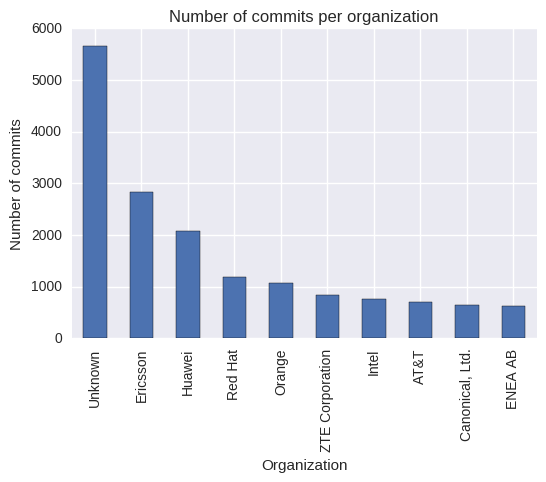

In [22]:
bar_plot = df_results.plot(kind="bar", legend = False, rot = 90)
bar_plot.set_title("Number of commits per organization")
bar_plot.set_xlabel("Organization")
bar_plot.set_ylabel("Number of commits")

##### Python query 1: Pie Chart (número de commits)

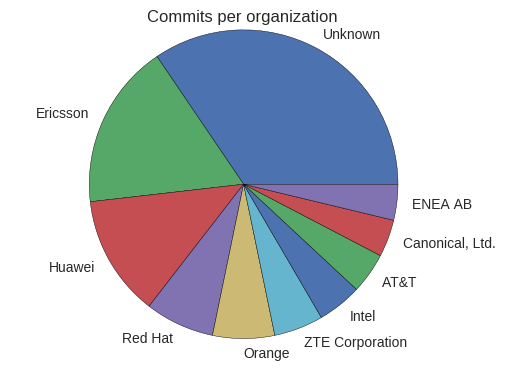

In [23]:
pie_chart = df_results["Commits"].plot(kind="pie")
pie_chart.axis('equal')
pie_chart.set_ylabel("")
pie_chart.set_title("Commits per organization")

##### Python query 1: Bar Plot (número de desarrolladores)

In [24]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_company', 'terms', field='Commit_org_name').metric('Developer', 'cardinality', field='Author')

query_filename = 'q1_developers.json'
file_path = "visualizaciones_python/query1/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_company",
                   key2 = "buckets", metric = "Developer")

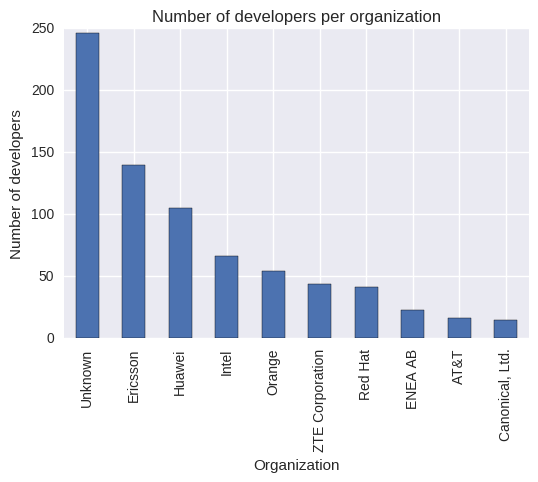

In [25]:
df_results = df_results.sort_values(by = "Developer" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False, rot=90)
bar_plot.set_title("Number of developers per organization")
bar_plot.set_xlabel("Organization")
bar_plot.set_ylabel("Number of developers")

##### Python query 1: Pie Chart (número de desarrolladores)

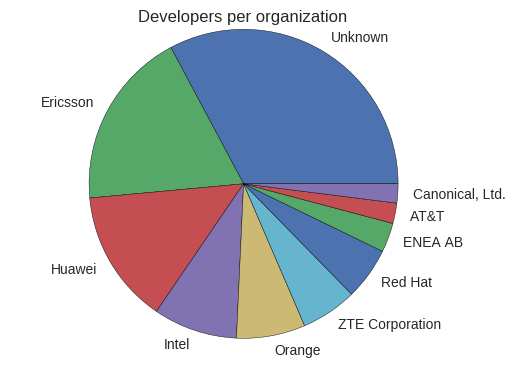

In [26]:
pie_chart = df_results["Developer"].plot(kind="pie")
pie_chart.axis('equal')
pie_chart.set_ylabel("")
pie_chart.set_title("Developers per organization")

### 2. Principales desarrolladores

###### Visualización json Kibana query 2 (autores por commits, archivo para importar)

```
[
  {
    "_id": "bbc08c70-3973-11e7-a221-b5c14b52d864",
    "_type": "visualization",
    "_source": {
      "title": "Query2_BarPlot_Commits",
      "visState": "{\"title\":\"Query2_BarPlot_Commits\",\"type\":\"histogram\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"scale\":\"linear\",\"mode\":\"stacked\",\"times\":[],\"addTimeMarker\":false,\"defaultYExtents\":false,\"setYExtents\":false},\"aggs\":[{\"id\":\"2\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"hash\",\"customLabel\":\"Number of commits\"}},{\"id\":\"3\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"author_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"2\",\"customLabel\":\"Developer\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 2 (autores por líneas añadidas, archivo para importar)

```
[
  {
    "_id": "271b6380-3976-11e7-a221-b5c14b52d864",
    "_type": "visualization",
    "_source": {
      "title": "Query2_BarPlot_AddedLines",
      "visState": "{\"title\":\"Query2_BarPlot_AddedLines\",\"type\":\"histogram\",\"params\":{\"addLegend\":true,\"addTimeMarker\":false,\"addTooltip\":true,\"defaultYExtents\":false,\"legendPosition\":\"right\",\"mode\":\"stacked\",\"scale\":\"linear\",\"setYExtents\":false,\"times\":[]},\"aggs\":[{\"id\":\"3\",\"enabled\":true,\"type\":\"sum\",\"schema\":\"metric\",\"params\":{\"field\":\"lines_added\",\"customLabel\":\"Number of lines\"}},{\"id\":\"4\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"Author\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"3\",\"customLabel\":\"Developer\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"analyze_wildcard\":true,\"query\":\"*\"}},\"filter\":[]}"
      }
    }
  }
]
```

##### Python query 2: Bar Plot (número de commits por desarrollador)

In [13]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_author', 'terms', field='author_name').metric('commits_per_developer', 'cardinality', field='hash')

query_filename = 'q2_commits.json'
file_path = "visualizaciones_python/query2/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_author",
                   key2 = "buckets", metric = "commits_per_developer")

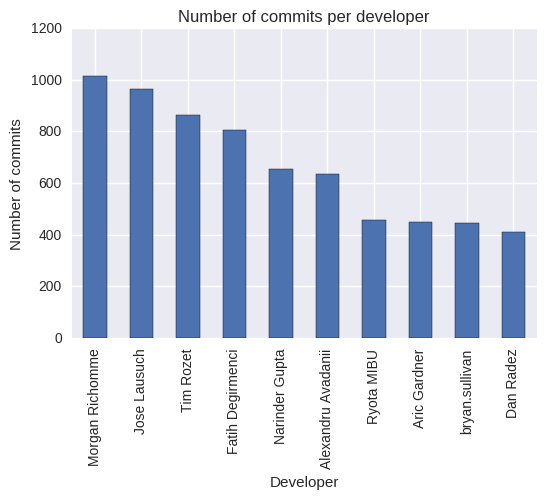

In [14]:
df_results = df_results.sort_values(by = "commits_per_developer" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False, rot=90)
bar_plot.set_title("Number of commits per developer")
bar_plot.set_xlabel("Developer")
bar_plot.set_ylabel("Number of commits")

** Python query 2: Pie Chart (número de commits por desarrollador) **

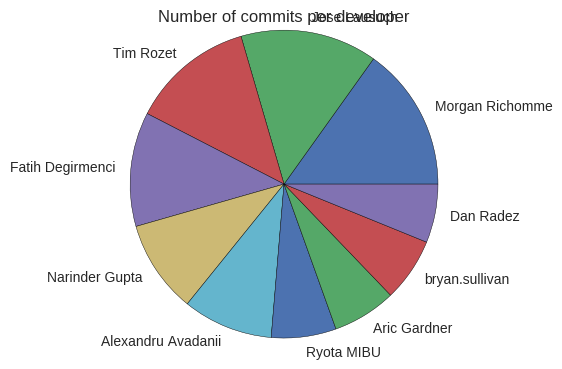

In [15]:
pie_chart = df_results["commits_per_developer"].plot(kind="pie")
pie_chart.axis('equal')
pie_chart.set_ylabel("")
pie_chart.set_title("Number of commits per developer")

##### Python query 2: Bar Plot (número de líneas añadidas por desarrollador)

In [16]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_author', 'terms', field='author_name').metric('lines_added_per_developer', 'sum', field='lines_added')

query_filename = 'q2_lines_added.json'
file_path = "visualizaciones_python/query2/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_author",
                   key2 = "buckets", metric = "lines_added_per_developer")

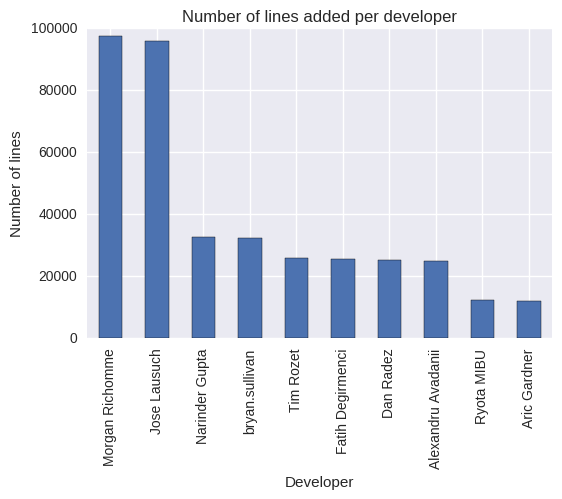

In [17]:
df_results = df_results.sort_values(by = "lines_added_per_developer" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False, rot=90)
bar_plot.set_title("Number of lines added per developer")
bar_plot.set_xlabel("Developer")
bar_plot.set_ylabel("Number of lines")

** Python query 2: Pie Chart (número de líneas añadidas por desarrollador) **

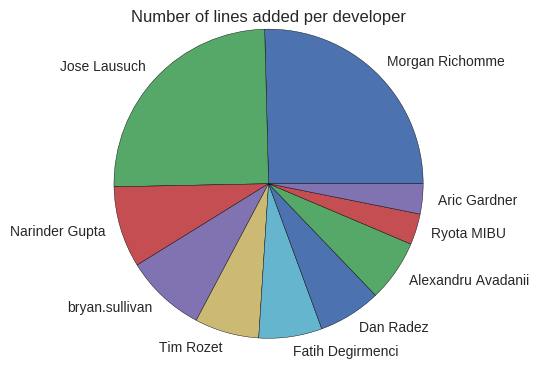

In [18]:
pie_chart = df_results["lines_added_per_developer"].plot(kind="pie")
pie_chart.axis('equal')
pie_chart.set_ylabel("")
pie_chart.set_title("Number of lines added per developer")

### 3. Repositorios más activos

###### Visualización json Kibana query 3 (número de commits, archivo para importar)

```
[
  {
    "_id": "41f788e0-395e-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query3_BarPlot_NumeroCommits",
      "visState": "{\"title\":\"Query3_BarPlot_NumeroCommits\",\"type\":\"histogram\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"scale\":\"linear\",\"mode\":\"stacked\",\"times\":[],\"addTimeMarker\":false,\"defaultYExtents\":false,\"setYExtents\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"count\",\"schema\":\"metric\",\"params\":{\"customLabel\":\"Number of commits\"}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"repo_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"1\",\"customLabel\":\"Project\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 3, pie chart (número de commits, archivo para importar)

```
[
  {
    "_id": "bcf54870-395e-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query3_PieChart_NumeroCommits",
      "visState": "{\"title\":\"Query3_PieChart_NumeroCommits\",\"type\":\"pie\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"isDonut\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"count\",\"schema\":\"metric\",\"params\":{}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"repo_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"1\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```


###### Visualización json Kibana query 3 (número de desarrolladores, archivo para importar)

```
[
  {
    "_id": "72a8bea0-395e-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query3_BarPlot_NumeroDevelopers",
      "visState": "{\"title\":\"Query3_BarPlot_NumeroDevelopers\",\"type\":\"histogram\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"scale\":\"linear\",\"mode\":\"stacked\",\"times\":[],\"addTimeMarker\":false,\"defaultYExtents\":false,\"setYExtents\":false},\"aggs\":[{\"id\":\"2\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"Author\",\"customLabel\":\"Number of developers\"}},{\"id\":\"3\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"repo_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"2\",\"customLabel\":\"Project\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 3, pie chart (número de desarrolladores, archivo para importar)

```
[
  {
    "_id": "f4142740-395e-11e7-94ba-910ee74e9632",
    "_type": "visualization",
    "_source": {
      "title": "Query3_PieChart_NumeroDevelopers",
      "visState": "{\"title\":\"Query3_PieChart_NumeroDevelopers\",\"type\":\"pie\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"isDonut\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"Author\"}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"repo_name\",\"size\":10,\"order\":\"desc\",\"orderBy\":\"1\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

##### Python query 3: Bar Plot (Número de commits)

In [27]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_repo', 'terms', field='repo_name').metric('Commits', 'value_count', field='Commit_id')

query_filename = 'q3_commits.json'
file_path = "visualizaciones_python/query3/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_repo",
                   key2 = "buckets", metric = "Commits")

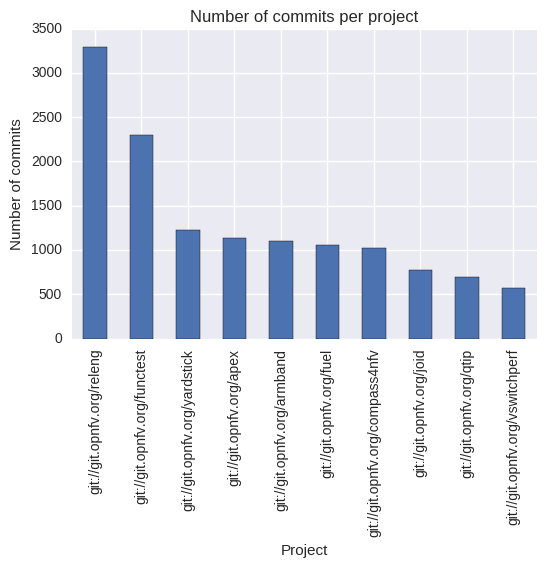

In [28]:
df_results = df_results.sort_values(by = "Commits" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False, rot=90)
bar_plot.set_title("Number of commits per project")
bar_plot.set_xlabel("Project")
bar_plot.set_ylabel("Number of commits")

##### Python query 3: Pie Chart (Número de commits)

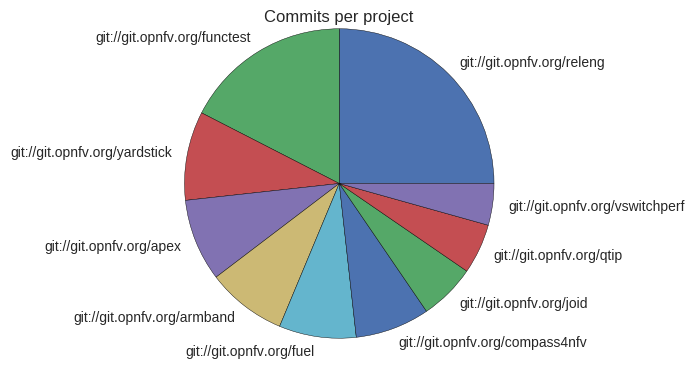

In [29]:
pie_chart = df_results["Commits"].plot(kind="pie")
pie_chart.axis('equal')
pie_chart.set_ylabel("")
pie_chart.set_title("Commits per project")

##### Python query 3: Bar Plot (Número de desarrolladores)

In [30]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_repo', 'terms', field='repo_name').metric('Developer', 'cardinality', field='Author')

query_filename = 'q3_developers.json'
file_path = "visualizaciones_python/query3/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_repo",
                   key2 = "buckets", metric = "Developer")

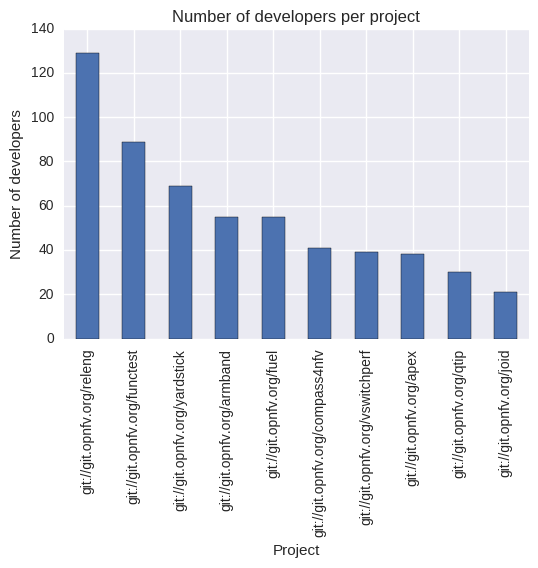

In [31]:
df_results = df_results.sort_values(by = "Developer" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False)
bar_plot.set_title("Number of developers per project")
bar_plot.set_xlabel("Project")
bar_plot.set_ylabel("Number of developers")

##### Python query 3: Pie Chart (Número de desarrolladores)

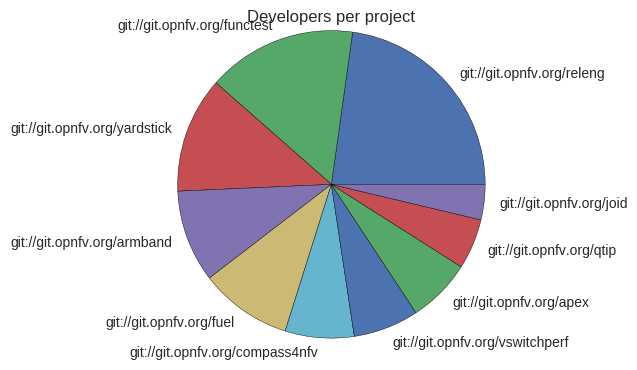

In [32]:
pie_chart = df_results["Developer"].plot(kind="pie")
pie_chart.axis('equal')
pie_chart.set_ylabel("")
pie_chart.set_title("Developers per project")

### 4. Organizaciones con más proyectos

###### Visualización json Kibana query 4 (archivo para importar)
```
[
  {
    "_id": "1e606ae0-397d-11e7-a221-b5c14b52d864",
    "_type": "visualization",
    "_source": {
      "title": "Query4_BarPlot",
      "visState": "{\"aggs\":[{\"enabled\":true,\"id\":\"2\",\"params\":{\"customLabel\":\"Number of projects\",\"field\":\"repo_name\"},\"schema\":\"metric\",\"type\":\"cardinality\"},{\"enabled\":true,\"id\":\"3\",\"params\":{\"customLabel\":\"Organization\",\"field\":\"Commit_org_name\",\"order\":\"desc\",\"orderBy\":\"2\",\"size\":10},\"schema\":\"segment\",\"type\":\"terms\"}],\"listeners\":{},\"params\":{\"addLegend\":true,\"addTimeMarker\":false,\"addTooltip\":true,\"defaultYExtents\":false,\"legendPosition\":\"right\",\"mode\":\"stacked\",\"scale\":\"linear\",\"setYExtents\":false,\"times\":[]},\"title\":\"Query4_BarPlot\",\"type\":\"histogram\"}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"analyze_wildcard\":true,\"query\":\"*\"}},\"filter\":[]}"
      }
    }
  }
]
```

Query

```
GET opnfvindex/_search
{
    "size": 0,
    "query": {
        "match_all": {}
    }, "post_filter": {
      "range": {
        "author_date": {
          "gte": "2015-01-01T00:00:00",
          "lte": "2018-01-01T00:00:00"
        }
      }
    }, "aggs": {
      "by_company": {
        "terms": {
          "field": "Commit_org_name"
        }, "aggs": {
          "Commits": {
            "cardinality": {
              "field": "repo_name"
            }
          }
        }
      }
    }
}
```
##### Python query 4: Bar Plot (Número de proyectos)

In [53]:
# Importamos el indice filtrando por fecha
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_company', 'terms', field='Commit_org_name', size=50).metric('Projects', 'cardinality', field='repo_name')

query_filename = 'q4.json'
file_path = "visualizaciones_python/query4/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_company",
                   key2 = "buckets", metric = "Projects", size = 10)

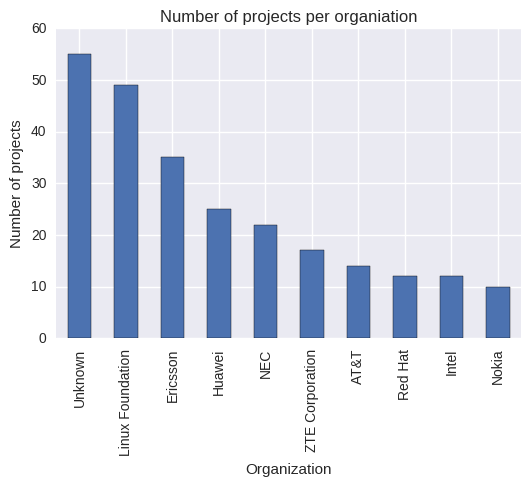

In [54]:
df_results = df_results.sort_values(by = "Projects" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False)
bar_plot.set_title("Number of projects per organiation")
bar_plot.set_xlabel("Organization")
bar_plot.set_ylabel("Number of projects")

### 5. Actividad de una empresa

###### Visualización json Kibana query 5 (timelion, archivo para importar)

```
[
  {
    "_id": "1c1d1e80-3965-11e7-bfd7-a75442eec853",
    "_type": "visualization",
    "_source": {
      "title": "Query5",
      "visState": "{\"type\":\"timelion\",\"title\":\"Query5\",\"params\":{\"expression\":\".es(timefield='author_date', index=opnfvindex, q=Commit_org_name:Ericsson)\",\"interval\":\"1w\"}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{}"
      }
    }
  }
]
```

###### Python query 5: Serial Time

In [33]:
company = "Ericsson"
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s = s.filter("term",Commit_org_name=company)

s.aggs.bucket('histogram', 'date_histogram', field='commit_date', interval='week').metric('commits', 'cardinality', field='hash')

query_filename = 'q5.json'
file_path = "visualizaciones_python/query5/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "histogram",
                   key2 = "buckets", metric = "commits",
                   key3 = "key_as_string", transform = False)
df_results.index = [item[0:10] for item in df_results.index]

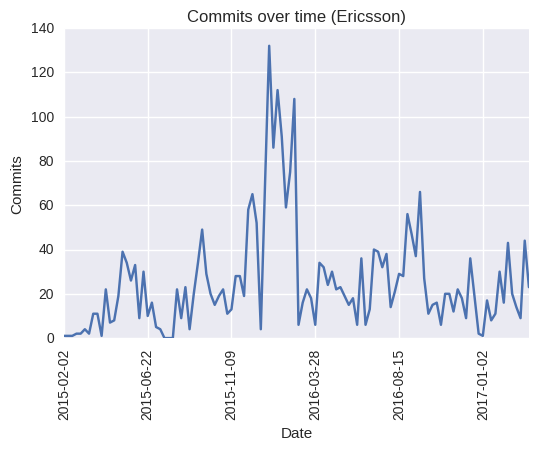

In [35]:
line_plot = df_results.plot(kind="line", rot=90, legend=False)
line_plot.set_title("Commits over time (Ericsson)")
line_plot.set_xlabel("Date")
line_plot.set_ylabel("Commits")

### 6. Importancia de proyectos

###### Visualización json Kibana query 6 (por empresa, archivo para importar)

```
[
  {
    "_id": "03f5f510-370e-11e7-a115-91b76e5b4506",
    "_type": "visualization",
    "_source": {
      "title": "Query6_1",
      "visState": "{\"title\":\"Query6_1\",\"type\":\"histogram\",\"params\":{\"addTooltip\":true,\"addLegend\":true,\"legendPosition\":\"right\",\"scale\":\"linear\",\"mode\":\"grouped\",\"times\":[],\"addTimeMarker\":false,\"defaultYExtents\":false,\"setYExtents\":false},\"aggs\":[{\"id\":\"1\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"author_name\",\"customLabel\":\"Authors\"}},{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"Commit_org_name\",\"size\":7,\"order\":\"desc\",\"orderBy\":\"1\",\"customLabel\":\"Company\"}},{\"id\":\"3\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"group\",\"params\":{\"field\":\"repo_name\",\"exclude\":{\"pattern\":\"\"},\"size\":3,\"order\":\"desc\",\"orderBy\":\"1\",\"customLabel\":\"Repos\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"*\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```

###### Visualización json Kibana query 6 (en la misma empresa, archivo para importar)

```
[
  {
    "_id": "f92c0f10-3984-11e7-a221-b5c14b52d864",
    "_type": "visualization",
    "_source": {
      "title": "Query6_2_BarPlot",
      "visState": "{\"title\":\"Query6_2_BarPlot\",\"type\":\"histogram\",\"params\":{\"addLegend\":true,\"addTimeMarker\":false,\"addTooltip\":true,\"defaultYExtents\":false,\"legendPosition\":\"right\",\"mode\":\"stacked\",\"scale\":\"linear\",\"setYExtents\":false,\"times\":[]},\"aggs\":[{\"id\":\"2\",\"enabled\":true,\"type\":\"terms\",\"schema\":\"segment\",\"params\":{\"field\":\"repo_name\",\"size\":11,\"order\":\"desc\",\"orderBy\":\"3\",\"customLabel\":\"Project\"}},{\"id\":\"3\",\"enabled\":true,\"type\":\"cardinality\",\"schema\":\"metric\",\"params\":{\"field\":\"author_name\",\"customLabel\":\"Number of developers\"}}],\"listeners\":{}}",
      "uiStateJSON": "{}",
      "description": "",
      "version": 1,
      "kibanaSavedObjectMeta": {
        "searchSourceJSON": "{\"index\":\"opnfvindex\",\"query\":{\"query_string\":{\"query\":\"Commit_org_name:Ericsson\",\"analyze_wildcard\":true}},\"filter\":[]}"
      }
    }
  }
]
```
##### Python query 6: Bar Plot (por empresa)

In [36]:
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)})
s.aggs.bucket('by_company', 'terms', field='Commit_org_name').bucket('by_repo', 'terms', field='repo_name', size = 50).metric('Authors', 'cardinality', field='author_name')

query_filename = 'q6_all.json'
file_path = "visualizaciones_python/query6/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df_composed(dict_data, 'by_company', 'by_repo', 'buckets', "Authors", key3 = "key", size = 3,
          transform = True)
print(df_results)

                              Authors       by_company
git://git.opnfv.org/armband        40          Unknown
git://git.opnfv.org/functest       27          Unknown
git://git.opnfv.org/releng         24          Unknown
git://git.opnfv.org/releng         49         Ericsson
git://git.opnfv.org/armband        40         Ericsson
git://git.opnfv.org/functest       34         Ericsson
git://git.opnfv.org/releng         49           Huawei
git://git.opnfv.org/armband        40           Huawei
git://git.opnfv.org/functest       34           Huawei
git://git.opnfv.org/releng         49          Red Hat
git://git.opnfv.org/armband        40          Red Hat
git://git.opnfv.org/functest       34          Red Hat
git://git.opnfv.org/releng         49           Orange
git://git.opnfv.org/armband        40           Orange
git://git.opnfv.org/functest       37           Orange
git://git.opnfv.org/releng         49  ZTE Corporation
git://git.opnfv.org/armband        40  ZTE Corporation
git://git.

['g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y', 'g', 'b', 'y']


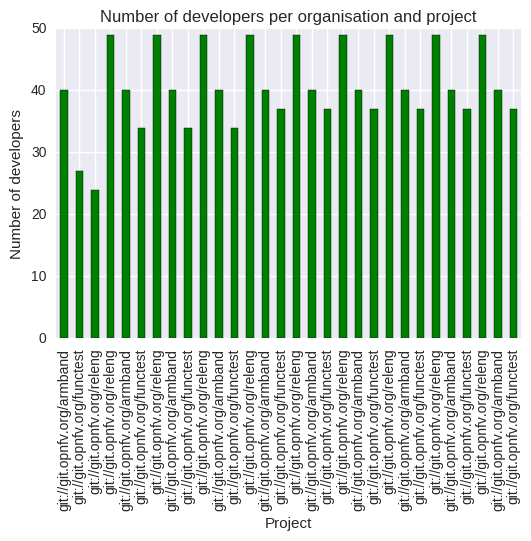

In [38]:
colors = {'Unknown': 'red', 'Ericsson': 'black', 'Huawei': 'g', 'Red Hat':'brown',
          'Orange':'orange', 'ZTE Corporation':'pink', 'Intel':'m', 'AT&T': 'y', 'Canonical, Ltd.':'darkcyan',
         'ENEA AB': 'darkblue'}

my_colors = [colors[i] for i in df_results['by_company']]

my_colors = ['g', 'b', 'y']*10
print(my_colors)

bar_plot = df_results.plot(kind="bar", color=my_colors, legend=False)
bar_plot.set_title("Number of developers per organisation and project")
bar_plot.set_xlabel("Project")
bar_plot.set_ylabel("Number of developers")

In [39]:
projects = [project.replace('git://git.opnfv.org/', "") 
            for project in df_results.index.unique()]

dict_values = {}
for project in projects:
    dict_values[project] = []

new_index = list()

for index, row in df_results.iterrows():
    curr_company = row["by_company"]
    curr_num = row["Authors"]
    curr_index = index.replace('git://git.opnfv.org/', "")
    if curr_company not in new_index:
        new_index.append(curr_company)
    dict_values[curr_index].append(curr_num)
    
refined_df = pd.DataFrame(data=dict_values, columns=projects, index=new_index)

print(refined_df)

                 armband  functest  releng
Unknown               40        27      24
Ericsson              40        34      49
Huawei                40        34      49
Red Hat               40        34      49
Orange                40        37      49
ZTE Corporation       40        37      49
Intel                 40        37      49
AT&T                  40        37      49
Canonical, Ltd.       40        37      49
ENEA AB               40        37      49


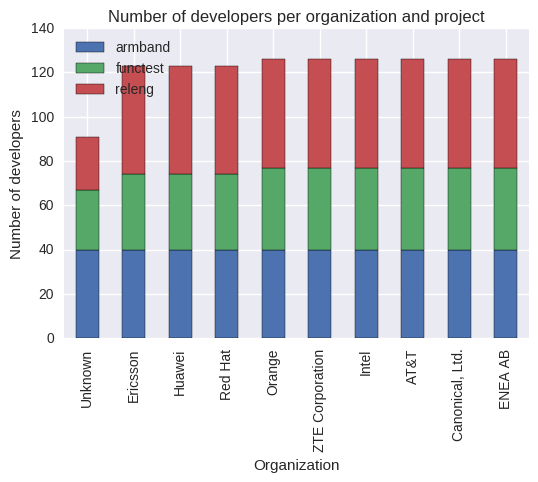

In [42]:
stacked_plot = refined_df.plot(kind="bar", stacked= True, legend=True)
stacked_plot.set_title("Number of developers per organization and project")
stacked_plot.set_xlabel("Organization")
stacked_plot.set_ylabel("Number of developers")

##### Python query 6: Bar Plot (en la misma empresa)

In [62]:
company = 'Ericsson'
s = Search(using=client, index=INDEX).filter('range', author_date={'gt': datetime(2015, 1, 1)}).filter("term",Commit_org_name=company)
s.aggs.bucket('by_repo', 'terms', field='repo_name', size=50).metric('Authors', 'cardinality', field='author_name')

query_filename = 'q6_ericsson.json'
file_path = "visualizaciones_python/query6/resultado_json/"
dict_data = show_and_export_data(query_filename, s, plot_path=file_path)

df_results = get_df(dict_data = dict_data, key1 = "by_repo",
                   key2 = "buckets", metric = "Authors", size=11)

print(df_results)

                               Authors
git://git.opnfv.org/releng          49
git://git.opnfv.org/functest        34
git://git.opnfv.org/fuel            27
git://git.opnfv.org/yardstick       23
git://git.opnfv.org/opnfvdocs       13
git://git.opnfv.org/sfc             11
git://git.opnfv.org/sdnvpn          11
git://git.opnfv.org/genesis          9
git://git.opnfv.org/pharos           6
git://git.opnfv.org/netready         5
git://git.opnfv.org/apex             5


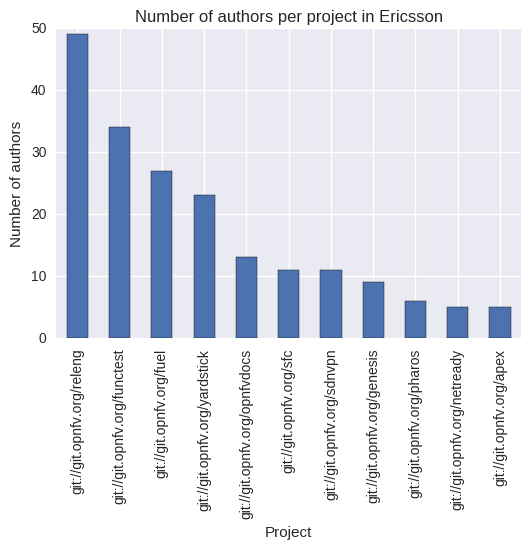

In [63]:
df_results = df_results.sort_values(by = "Authors" ,ascending=False)
bar_plot = df_results.plot(kind="bar", legend = False)
bar_plot.set_title("Number of authors per project in Ericsson")
bar_plot.set_xlabel("Project")
bar_plot.set_ylabel("Number of authors")